# Libraries

In [66]:
import numpy as np
import os
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt
from datetime import date,timedelta
import copy

# Useful functions

In [67]:
#The datasets get uploaded daily. Every day tehre is a new dataset, but its uploaded at different ours. To prevent errors,
#we upload it from the day before, so tehre should be no errors
yesterday = date.today() - timedelta(days=1)

date_list=pd.date_range(start="2020-02-24",end=yesterday) #time period from when the datasets starts until yesterday
str_date=[]
str_date_formatted=[]
#formatting the data to use it as a name of the columns of the new dataset and to use it for the github files
for i in range(len(date_list)):
    str_date.append(str(date_list[i]).replace("-", ""))
    str_date_formatted.append(str_date[i][:-9])


    
#This is for the plot of the various things we want to plot
def condition_plot(x,y,title):
    plt.figure()
    #plotting every provinces
    for i in range(1,len(y)):
        plt.plot(x,y[i][1:],label=y[i][0])
    plt.legend(bbox_to_anchor=(1, 1.05))


    plt.xlabel('Days')
    plt.ylabel(title[0])
    plt.title(title[0]+' for '+title[1])

    plt.show()
    plt.clf()

#this is to have a top ten list of regions/provinces
def top_ten_list(dataset,name_column):
    #loading the list
    y=[]  #list of the condition for provinces/regions, in which every entry of the list is a day (its a list of lists)
    for i in range(dataset.shape[0]):
        y.append(dataset.iloc[i,name_column:]) #position 1 is the province name, which we need for the label in the graph

    #Let's start with the top ten 
    top_ten=[]
    last_day=[]
    #first let's determine the last day how many people has a certain condition
    for i in range(name_column,len(y)):
        last_day.append(y[i][-1])
    last_day.sort(reverse = True)

  
    #then let's have only the first 10
    for i in range(name_column,len(y)):
        if y[i][-1] in last_day[0:10]:
            top_ten.append(y[i])
    
    return top_ten


# Dataset rielaboration - Provinces

In [68]:
#there are to many csv files with shared information.
#With this procedure we will merge those datasets into one

#Let's take the base frame of the dataset and adding the new information of the other files

#The files are taken directly from the website of github, so everytime they add a new file, it will be added to our dataset aswell
#We upload just the first one to have the structure, because from the other one we will need only the total cases columns
url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province-'+str_date_formatted[0]+'.csv'
time_line_dataset = pd.read_csv(url)
del time_line_dataset['totale_casi']

for i in range(0,len(str_date_formatted)):
    url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province-'+str_date_formatted[i]+'.csv'
    
    temp_data=pd.read_csv(url)
    time_line_dataset[str_date_formatted[i]]=temp_data['totale_casi']

 
#removing empty data
##NB: Naples has problems with NA. We decided to modify the field directly from the base dataset. So that even if we update 
##the dataset should work no problem
time_line_dataset=time_line_dataset[time_line_dataset.sigla_provincia.notnull()]


#removing useless/redundant columns
del time_line_dataset['data'] #we already have data columns added in the reworking
del time_line_dataset['stato'] #it's the italian database, we already know
del time_line_dataset['codice_regione'] #it's an indicative value, it doesn't mean anything
del time_line_dataset['codice_provincia'] #it's an indicative value, it doesn't mean anything
del time_line_dataset['lat'] #We don't need this value knowing the city
del time_line_dataset['long'] #We don't need this value knowing the city
del time_line_dataset['sigla_provincia'] #We don't need this value knowing the city
del time_line_dataset['note_it']
del time_line_dataset['note_en']

#saving reworked dataset TURN THE OPTION ON IF YOU WANT TO SAVE IT
#time_line_dataset.to_csv('rielab_dataset_merged.csv') 



# Dataset rielaboration - Provinces Graphs

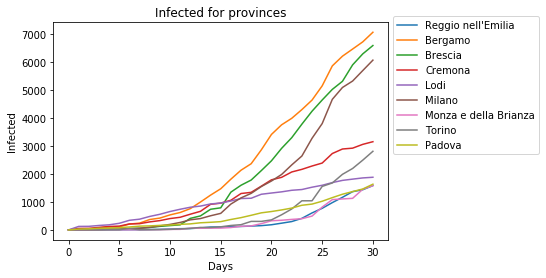

<Figure size 432x288 with 0 Axes>

In [69]:
#Let's try to see if there are some useful base information that we can conclude from these data
#We will try a standard a graph to see the ongoing of the illness on the various provinces, and a bar graph to see 
#which provinces/region we have the most amount of ill people

x=len(time_line_dataset.columns[2:]) #number of days. Everytime we will add a new day, the value of x will be updated
x=range(0,x)




condition_plot(x,top_ten_list(time_line_dataset,1),['Infected','provinces'])


# Dataset rielaboration - Regions

In [70]:
# Here we will make different datasets for each condition (deaths, tampons ecc...), so that will be easy afterward to analyze them
#Let's strat with the structur as before
url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni-'+str_date_formatted[0]+'.csv'
time_line_dataset_regions = pd.read_csv(url)

#removing useless/redundant columns

del time_line_dataset_regions['data'] #we already have data columns added in the reworking
del time_line_dataset_regions['stato'] #it's the italian database, we already know
del time_line_dataset_regions['codice_regione'] #it's an indicative value, it doesn't mean anything
del time_line_dataset_regions['ricoverati_con_sintomi'] #this column will be its own dataset
del time_line_dataset_regions['lat'] #We don't need this value knowing the city
del time_line_dataset_regions['long'] #We don't need this value knowing the city
del time_line_dataset_regions['note_it']
del time_line_dataset_regions['note_en']
del time_line_dataset_regions['terapia_intensiva'] #this column will be its own dataset
del time_line_dataset_regions['totale_ospedalizzati'] #this column will be its own dataset
del time_line_dataset_regions['isolamento_domiciliare']#this column will be its own dataset
del time_line_dataset_regions['totale_attualmente_positivi'] #this column will be its own dataset
del time_line_dataset_regions['nuovi_attualmente_positivi']#this column will be its own dataset
del time_line_dataset_regions['dimessi_guariti']#this column will be its own dataset
del time_line_dataset_regions['deceduti'] #this column will be its own dataset
del time_line_dataset_regions['totale_casi'] #this column will be its own dataset
del time_line_dataset_regions['tamponi'] #this column will be its own dataset

#building a dataset for condition
tl_hospitalized_with_symptoms=copy.deepcopy(time_line_dataset_regions)
tl_intensive_teraphy=copy.deepcopy(time_line_dataset_regions)
tl_total_hospitalized=copy.deepcopy(time_line_dataset_regions)
tl_isolation=copy.deepcopy(time_line_dataset_regions)
tl_actual_positives=copy.deepcopy(time_line_dataset_regions)
tl_new_actual_positives=copy.deepcopy(time_line_dataset_regions)
tl_recovered=copy.deepcopy(time_line_dataset_regions)
tl_deaths=copy.deepcopy(time_line_dataset_regions)
tl_total=copy.deepcopy(time_line_dataset_regions)
tl_tampons=copy.deepcopy(time_line_dataset_regions)


#uploading every day for each dataset
for i in range(0,len(str_date_formatted)):
    url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni-'+str_date_formatted[i]+'.csv'
    
    temp_data=pd.read_csv(url)
    tl_hospitalized_with_symptoms[str_date_formatted[i]]=temp_data['ricoverati_con_sintomi']
    tl_intensive_teraphy[str_date_formatted[i]]=temp_data['terapia_intensiva']
    tl_total_hospitalized[str_date_formatted[i]]=temp_data['totale_ospedalizzati']
    tl_isolation[str_date_formatted[i]]=temp_data['isolamento_domiciliare']
    tl_actual_positives[str_date_formatted[i]]=temp_data['totale_attualmente_positivi']
    tl_new_actual_positives[str_date_formatted[i]]=temp_data['nuovi_attualmente_positivi']
    tl_recovered[str_date_formatted[i]]=temp_data['dimessi_guariti']
    tl_deaths[str_date_formatted[i]]=temp_data['deceduti']
    tl_total[str_date_formatted[i]]=temp_data['totale_casi']
    tl_tampons[str_date_formatted[i]]=temp_data['tamponi']




# Dataset rielaboration - Regions Graphs

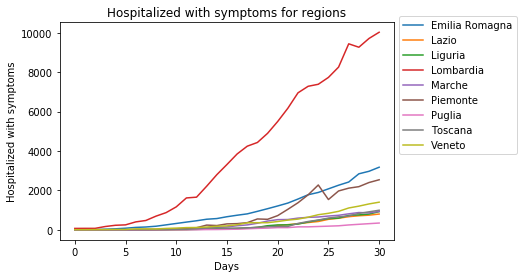

<Figure size 432x288 with 0 Axes>

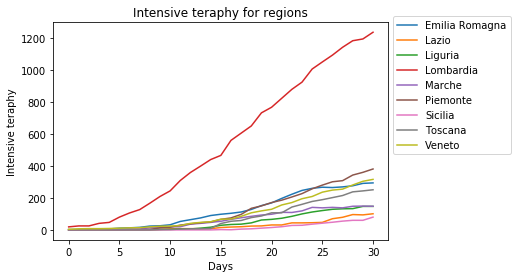

<Figure size 432x288 with 0 Axes>

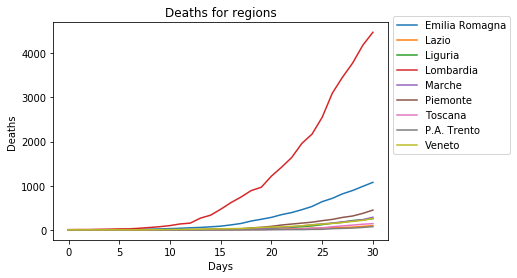

<Figure size 432x288 with 0 Axes>

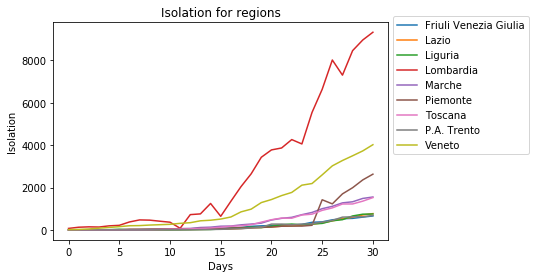

<Figure size 432x288 with 0 Axes>

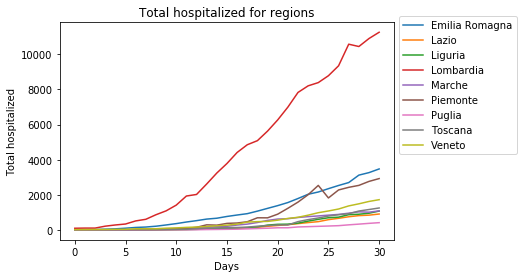

<Figure size 432x288 with 0 Axes>

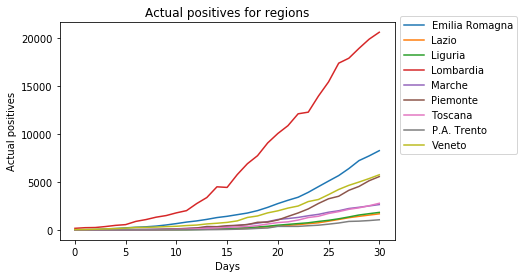

<Figure size 432x288 with 0 Axes>

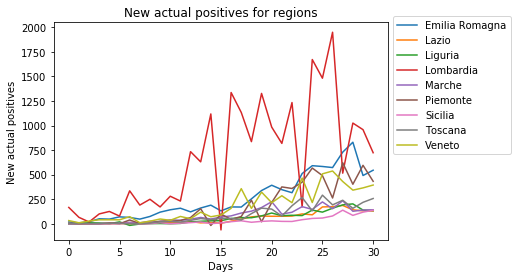

<Figure size 432x288 with 0 Axes>

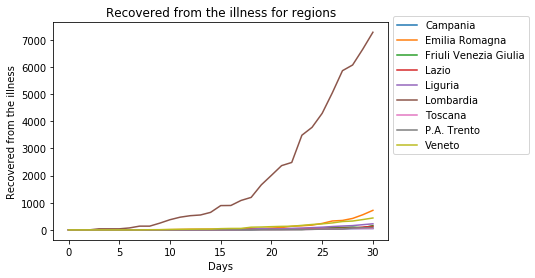

<Figure size 432x288 with 0 Axes>

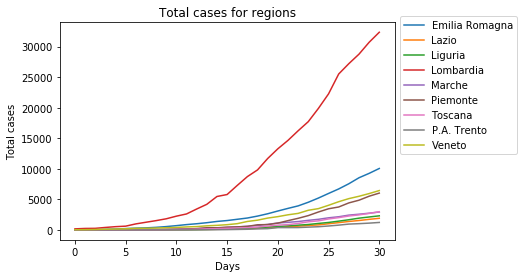

<Figure size 432x288 with 0 Axes>

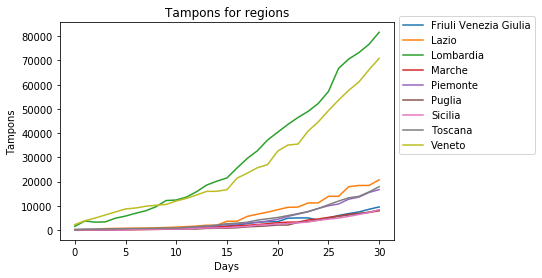

<Figure size 432x288 with 0 Axes>

In [71]:
x=len(tl_hospitalized_with_symptoms.columns[1:]) #number of days. Everytime we will add a new day, the value of x will be updated
x=range(0,x)


condition_plot(x,top_ten_list(tl_hospitalized_with_symptoms,0),['Hospitalized with symptoms','regions'])
condition_plot(x,top_ten_list(tl_intensive_teraphy,0),['Intensive teraphy','regions'])
condition_plot(x,top_ten_list(tl_deaths,0),['Deaths','regions'])
condition_plot(x,top_ten_list(tl_isolation,0),['Isolation','regions'])
condition_plot(x,top_ten_list(tl_total_hospitalized,0),['Total hospitalized','regions'])
condition_plot(x,top_ten_list(tl_actual_positives,0),['Actual positives','regions'])
condition_plot(x,top_ten_list(tl_new_actual_positives,0),['New actual positives','regions'])
condition_plot(x,top_ten_list(tl_recovered,0),['Recovered from the illness','regions'])
condition_plot(x,top_ten_list(tl_total,0),['Total cases','regions'])
condition_plot(x,top_ten_list(tl_tampons,0),['Tampons','regions'])

# Miscellanous

In [72]:
#This code is when you downlaod the csv files on you pcs
#file by file we are taking 
'''
for filename in listdir("./dati-province\\"):
   
    temp_data= pd.read_csv("./\\"+filename)

    time_line_dataset[filename[-12:-4]]=temp_data['totale_casi']
'''

'\nfor filename in listdir("./dati-province\\"):\n   \n    temp_data= pd.read_csv("./\\"+filename)\n\n    time_line_dataset[filename[-12:-4]]=temp_data[\'totale_casi\']\n'